In [18]:
# Étape 0 : Imports de base

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [19]:
# Étape 1 : Chargement du dataset
# Adapter le chemin si nécessaire
df = pd.read_csv("student-mat.csv", sep=";")

# Aperçu des premières lignes
df.head()
# Infos générales sur le dataset
df.info()
# Statistiques descriptives pour les variables numériques
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [22]:
#Étape 2 – Compréhension & exploration des données (EDA)
#2.1. Vérifier les valeurs manquantes
# Vérifier les valeurs manquantes
df.isna().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

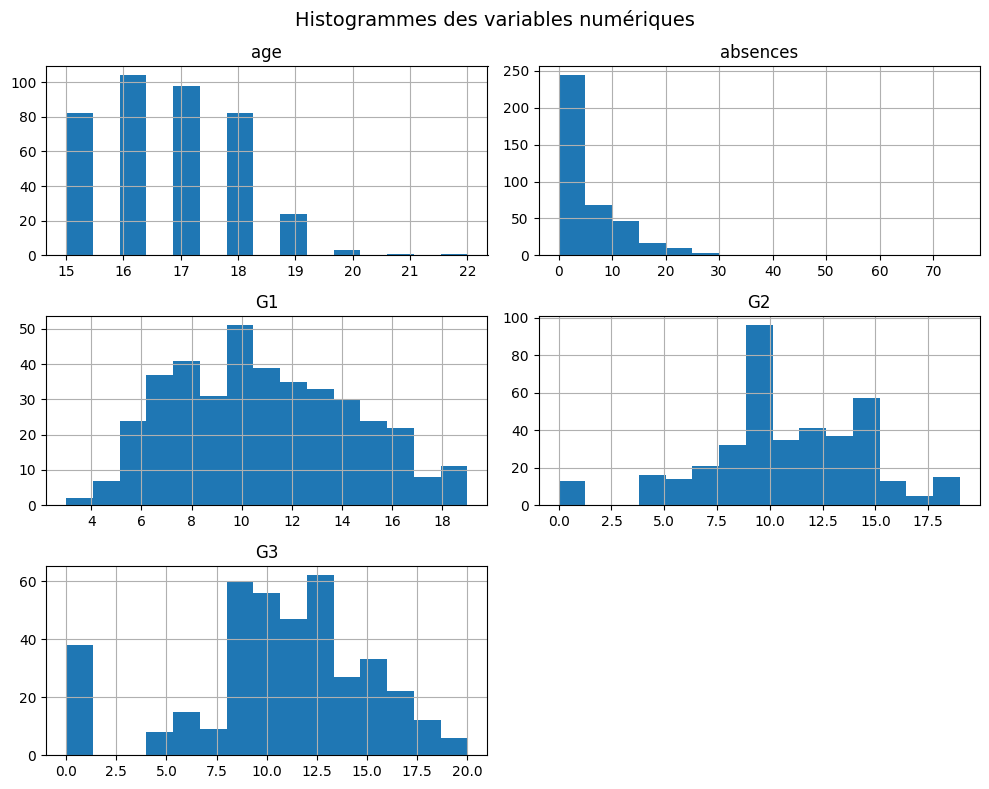

In [23]:
#2.2. Visualiser quelques distributions (histogrammes)
#a) Histogrammes pour des variables numériques
# Sélection de quelques variables numériques intéressantes
vars_numeriques = ["age", "absences", "G1", "G2", "G3"]

df[vars_numeriques].hist(bins=15, figsize=(10, 8))
plt.suptitle("Histogrammes des variables numériques", fontsize=14)
plt.tight_layout()
plt.show()

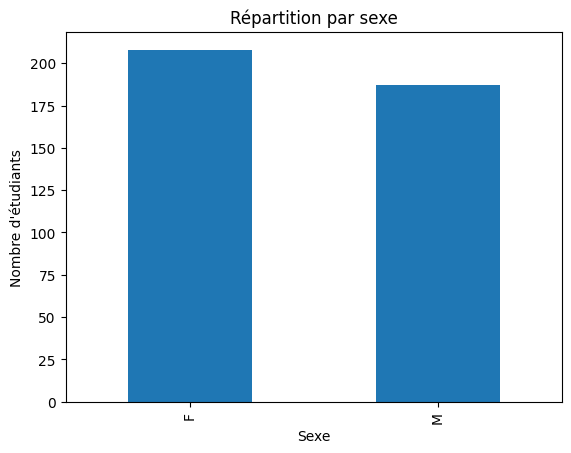

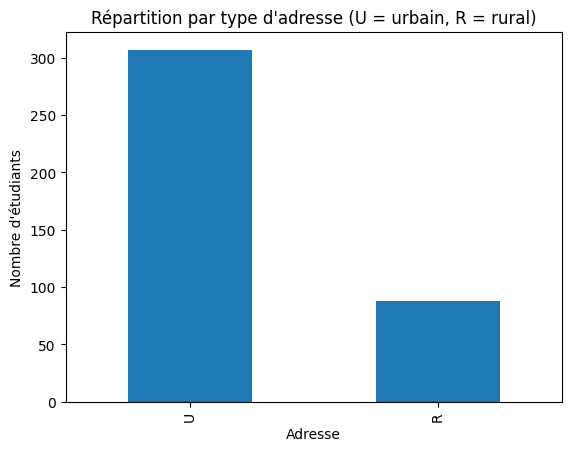

In [24]:
#b) Diagrammes en barres pour des variables catégorielles
# Exemple pour le sexe
df["sex"].value_counts().plot(kind="bar")
plt.title("Répartition par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'étudiants")
plt.show()

# Exemple pour le type d'adresse
df["address"].value_counts().plot(kind="bar")
plt.title("Répartition par type d'adresse (U = urbain, R = rural)")
plt.xlabel("Adresse")
plt.ylabel("Nombre d'étudiants")
plt.show()

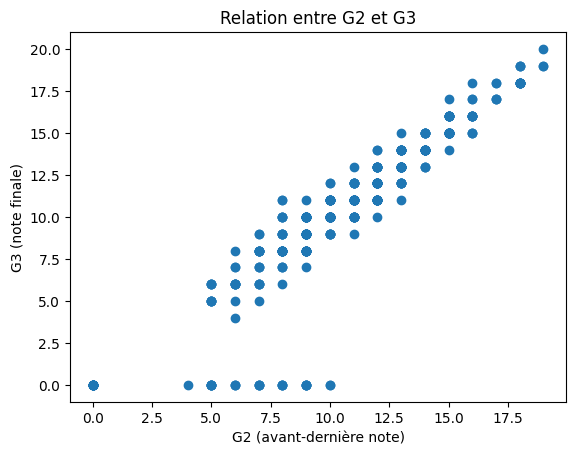

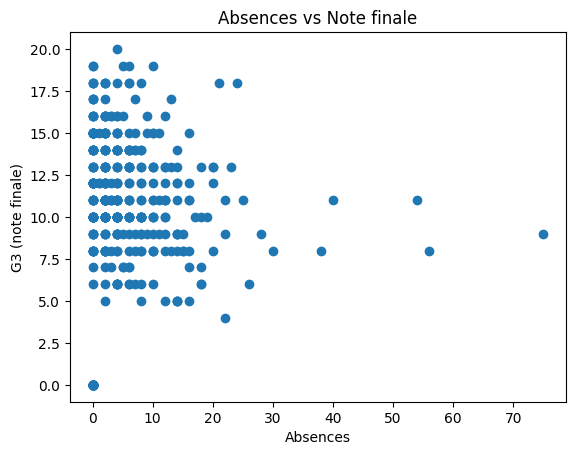

In [26]:
#2.3. Relation entre la note finale G3 et d’autres variables
plt.scatter(df["G2"], df["G3"])
plt.xlabel("G2 (avant-dernière note)")
plt.ylabel("G3 (note finale)")
plt.title("Relation entre G2 et G3")
plt.show()
plt.scatter(df["absences"], df["G3"])
plt.xlabel("Absences")
plt.ylabel("G3 (note finale)")
plt.title("Absences vs Note finale")
plt.show()

In [27]:
# Étape 3 : Création de la variable cible
df["passed"] = (df["G3"] >= 10).astype(int)

df[["G3", "passed"]].head()

,G3,passed
0,6,0
1,6,0
2,10,1
3,15,1
4,10,1


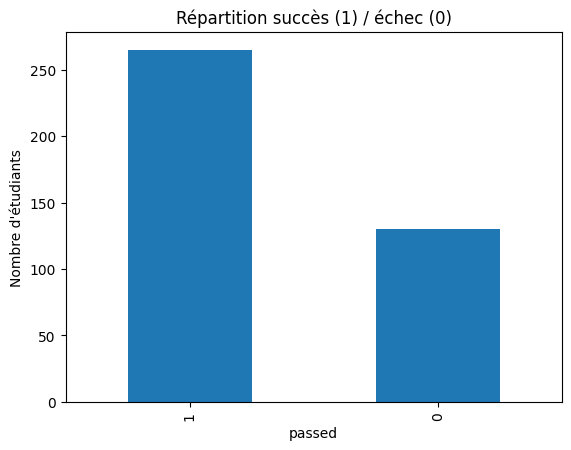

passed
1    0.670886
0    0.329114
Name: proportion, dtype: float64

In [29]:
#Vérifions la répartition réussite/échec :
df["passed"].value_counts().plot(kind="bar")
plt.title("Répartition succès (1) / échec (0)")
plt.xlabel("passed")
plt.ylabel("Nombre d'étudiants")
plt.show()

df["passed"].value_counts(normalize=True)

In [30]:
#Étape 4 – Préparation des données pour les modèles
#4.1. Séparation X (features) / y (target)
# On enlève G3 (note brute) pour ne conserver que la variable binaire
# On peut aussi enlever G1 et G2 si on veut simuler une prédiction sans les notes intermédiaires
# -> à vous de décider et de justifier dans le rapport.
features_to_drop = ["G3"]  # vous pouvez tester aussi ["G1", "G2", "G3"]

X = df.drop(columns=features_to_drop + ["passed"])
y = df["passed"]

X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [32]:
# 4.2. Encodage des variables catégorielles (One-Hot Encoding)
# One-Hot Encoding des variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [34]:
#4.3. Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((316, 41), (79, 41))

In [35]:
# 4.4. Normalisation / standardisation (utile pour KNN, régression logistique)
# Standardisation des features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#5.1. Fonction utilitaire pour évaluer un modèle
def evaluer_modele(nom_modele, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"=== {nom_modele} ===")
    print(f"Accuracy :  {acc:.3f}")
    print(f"Précision : {prec:.3f}")
    print(f"Rappel :    {rec:.3f}")
    print(f"F1-score :  {f1:.3f}")
    print()
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matrice de confusion - {nom_modele}")
    plt.show()
    
    # Rapport détaillé
    print("Classification report :")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    return {
        "modèle": nom_modele,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    }

=== Régression logistique ===
Accuracy :  0.848
Précision : 0.936
Rappel :    0.830
F1-score :  0.880



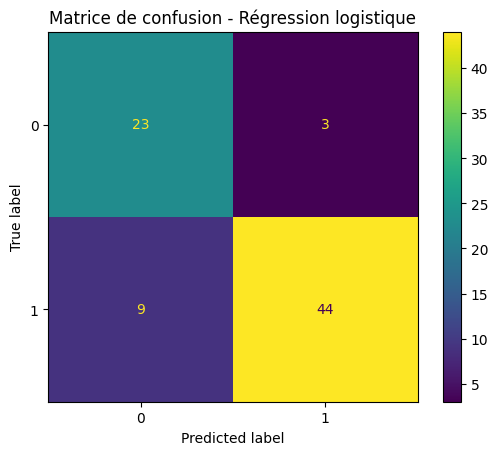

Classification report :
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        26
           1       0.94      0.83      0.88        53

    accuracy                           0.85        79
   macro avg       0.83      0.86      0.84        79
weighted avg       0.86      0.85      0.85        79



In [37]:
#5.2. Régression logistique
# Régression logistique
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

res_log = evaluer_modele("Régression logistique", y_test, y_pred_log)

=== Arbre de décision ===
Accuracy :  0.861
Précision : 0.957
Rappel :    0.830
F1-score :  0.889



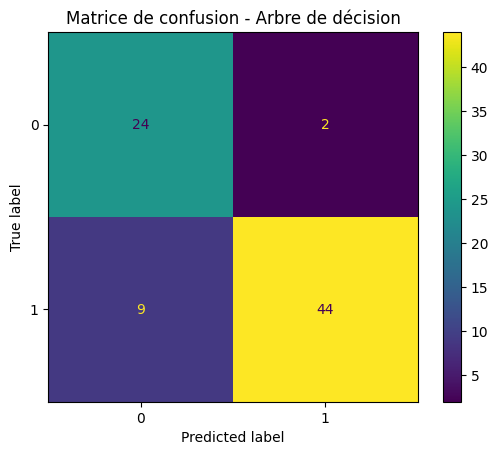

Classification report :
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        26
           1       0.96      0.83      0.89        53

    accuracy                           0.86        79
   macro avg       0.84      0.88      0.85        79
weighted avg       0.88      0.86      0.86        79



In [38]:
# 5.3. Arbre de décision
# Arbre de décision
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)  # pas besoin de données normalisées
y_pred_tree = tree_clf.predict(X_test)

res_tree = evaluer_modele("Arbre de décision", y_test, y_pred_tree)

=== KNN (k=5) ===
Accuracy :  0.696
Précision : 0.723
Rappel :    0.887
F1-score :  0.797



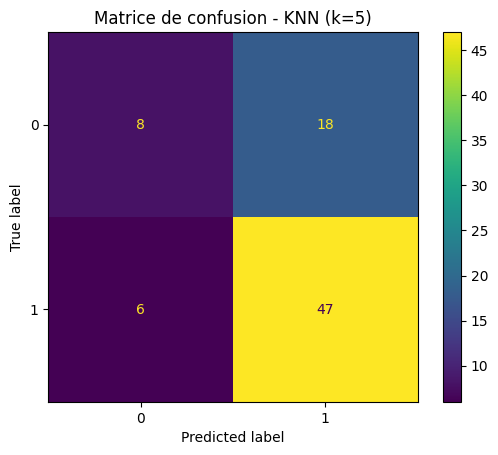

Classification report :
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        26
           1       0.72      0.89      0.80        53

    accuracy                           0.70        79
   macro avg       0.65      0.60      0.60        79
weighted avg       0.67      0.70      0.67        79



In [39]:
# 5.4. KNN (k plus proches voisins)
# KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)

res_knn = evaluer_modele("KNN (k=5)", y_test, y_pred_knn)

=== Naïve Bayes ===
Accuracy :  0.810
Précision : 0.880
Rappel :    0.830
F1-score :  0.854



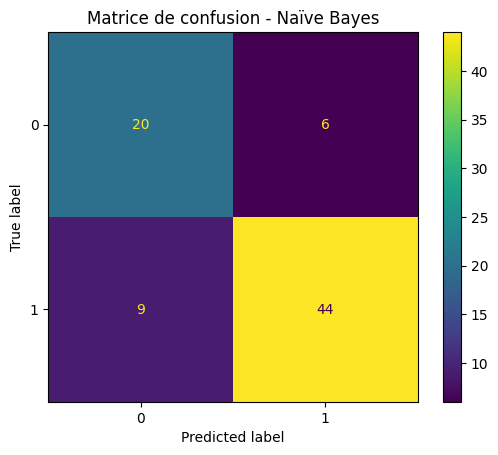

Classification report :
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.88      0.83      0.85        53

    accuracy                           0.81        79
   macro avg       0.78      0.80      0.79        79
weighted avg       0.82      0.81      0.81        79



In [40]:
# 5.5. Naïve Bayes
# Naïve Bayes
nb_clf = GaussianNB()

nb_clf.fit(X_train_scaled, y_train)
y_pred_nb = nb_clf.predict(X_test_scaled)

res_nb = evaluer_modele("Naïve Bayes", y_test, y_pred_nb)

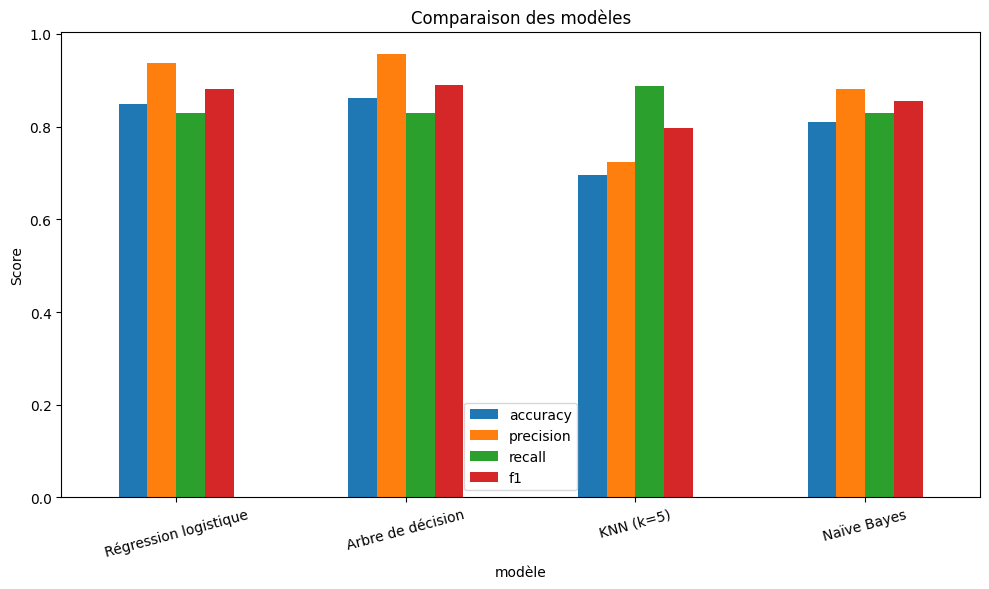

In [41]:
#5.6. Comparaison globale des modèles
resultats = pd.DataFrame([res_log, res_tree, res_knn, res_nb])
resultats
# Visualisation rapide des scores F1 par modèle
resultats.set_index("modèle")[["accuracy", "precision", "recall", "f1"]].plot(kind="bar", figsize=(10, 6))
plt.title("Comparaison des modèles")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [42]:
#Étape 6 – Analyse des variables importantes
#6.1. Importance des features pour l’arbre de décision
# Importances des features pour l'arbre de décision
importances = tree_clf.feature_importances_
feature_names = X_train.columns

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=False).head(15)

G2               0.767129
Fjob_other       0.046438
traveltime       0.038671
Walc             0.033818
health           0.029063
famsize_LE3      0.017199
age              0.011964
G1               0.011825
schoolsup_yes    0.010749
absences         0.010749
sex_M            0.009772
Fedu             0.008599
Dalc             0.004023
studytime        0.000000
Medu             0.000000
dtype: float64

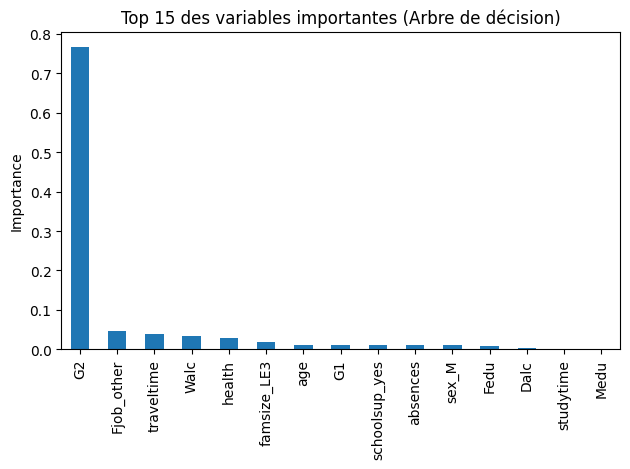

In [43]:
# Visualisation des 15 variables les plus importantes
feat_importances.sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Top 15 des variables importantes (Arbre de décision)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [44]:
#6.2. Coefficients de la régression logistique
coef = log_reg.coef_[0]
feature_names_scaled = X_train.columns

coef_df = pd.DataFrame({
    "feature": feature_names_scaled,
    "coef": coef
})

coef_df["abs_coef"] = coef_df["coef"].abs()
coef_df.sort_values(by="abs_coef", ascending=False).head(15)

,feature,coef,abs_coef
14,G2,4.027208,4.027208
13,G1,1.968586,1.968586
0,age,-0.813609,0.813609
10,Walc,0.768131,0.768131
15,school_MS,0.697301,0.697301
25,Fjob_other,0.670248,0.670248
6,famrel,0.477524,0.477524
21,Mjob_other,-0.436004,0.436004
5,failures,-0.431015,0.431015
31,guardian_mother,-0.376776,0.376776


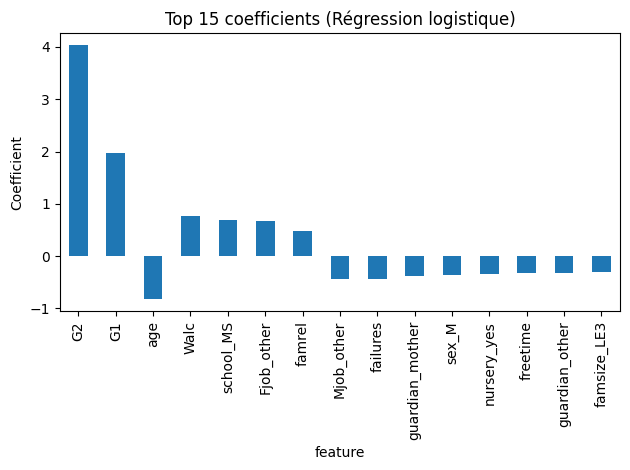

In [45]:
coef_df.sort_values(by="abs_coef", ascending=False).head(15).set_index("feature")["coef"].plot(kind="bar")
plt.title("Top 15 coefficients (Régression logistique)")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()